In [1]:
import pandas as pd
# Cambia 'archivo.csv' por el nombre real de tus archivos
df = pd.read_csv('titulos.csv')
print(df.head())


   anio  mes documento                        nombre_completo  carrera_id  \
0     1   11   4293889              BERNARDINA ROLON GUERRERO         111   
1     1   12   4233874              EDI ISABEL BERNAL BENITEZ         111   
2     2    3   1884029         LIDUVINA CABRERA DE PRESENTADO          41   
3     2   12   1262724                     AIDA MABEL CABRERA          49   
4     3   12   3501374  JORGELINA GOMEZ DE LA FUENTE SANABRIA          79   

                    carrera  titulo_id  \
0                ENFERMERIA        110   
1                ENFERMERIA        792   
2        CIENCIAS CONTABLES        792   
3  CIENCIAS DE LA EDUCACION        580   
4                   DERECHO         62   

                                     titulo numero_resolucion  \
0                LICENCIADO/A EN ENFERMERIA              1545   
1                              LICENCIADO/A               S/R   
2                              LICENCIADO/A       DGES Nº 166   
3  LICENCIADO/A EN CIENC

In [ ]:
print(df.info())
print(df.columns)
print(df.describe(include='all'))
# Para ver mejor la salida usar display
from IPython.display import display
display(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655277 entries, 0 to 655276
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   anio                 655277 non-null  int64  
 1   mes                  655277 non-null  int64  
 2   documento            655277 non-null  object 
 3   nombre_completo      655277 non-null  object 
 4   carrera_id           655277 non-null  int64  
 5   carrera              655277 non-null  object 
 6   titulo_id            655277 non-null  int64  
 7   titulo               655277 non-null  object 
 8   numero_resolucion    655274 non-null  object 
 9   fecha_resolucion     655263 non-null  object 
 10  tipo_institucion_id  655249 non-null  float64
 11  tipo_institucion     655249 non-null  object 
 12  institucion_id       655277 non-null  int64  
 13  institucion          655277 non-null  object 
 14  gobierno_actual      655277 non-null  object 
 15  sexo             

,anio,mes,documento,nombre_completo,carrera_id,carrera,titulo_id,titulo,numero_resolucion,fecha_resolucion,tipo_institucion_id,tipo_institucion,institucion_id,institucion,gobierno_actual,sexo
count,655277.000000,655277.000000,655277,655277,655277.000000,655277,655277.000000,655277,655274,655263,655249.000000,655249,6.552770e+05,655277,655277,654114
unique,NaN,NaN,458959,458268,NaN,2032,NaN,963,106929,5921,NaN,12,NaN,513,2,2
top,NaN,NaN,2451153,DENIS ALBERTO JARA VERA,NaN,ENFERMERIA,NaN,LICENCIADO/A,S/R,2015-12-30,NaN,UNIVERSIDAD,NaN,UNIVERSIDAD TECNICA DE COMERCIALIZACION Y DESA...,Si,MUJER
freq,NaN,NaN,17,17,NaN,50618,NaN,211822,8025,2917,NaN,440887,NaN,32713,622784,430480
mean,2019.765231,6.592511,NaN,NaN,944.459868,NaN,1550.881890,NaN,NaN,NaN,15.313493,NaN,4.236464e+05,NaN,NaN,NaN
std,62.078604,3.475382,NaN,NaN,1435.285052,NaN,995.981537,NaN,NaN,NaN,2.613068,NaN,2.609253e+05,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,6.000000,NaN,7.002300e+04,NaN,NaN,NaN
25%,2017.000000,4.000000,NaN,NaN,79.000000,NaN,792.000000,NaN,NaN,NaN,16.000000,NaN,3.169060e+05,NaN,NaN,NaN
50%,2021.000000,7.000000,NaN,NaN,208.000000,NaN,1908.000000,NaN,NaN,NaN,16.000000,NaN,3.169440e+05,NaN,NaN,NaN
75%,2023.000000,10.000000,NaN,NaN,984.000000,NaN,2119.000000,NaN,NaN,NaN,16.000000,NaN,3.206250e+05,NaN,NaN,NaN


In [3]:
print(df.isnull().sum())


anio                      0
mes                       0
documento                 0
nombre_completo           0
carrera_id                0
carrera                   0
titulo_id                 0
titulo                    0
numero_resolucion         3
fecha_resolucion         14
tipo_institucion_id      28
tipo_institucion         28
institucion_id            0
institucion               0
gobierno_actual           0
sexo                   1163
dtype: int64


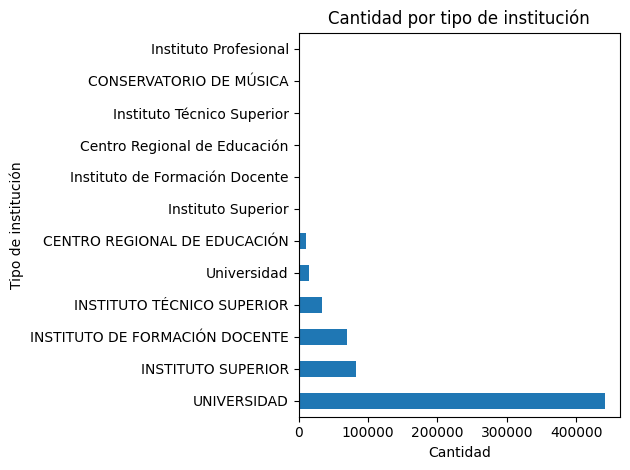

In [5]:
import matplotlib.pyplot as plt

df['tipo_institucion'].value_counts().plot(kind='barh')
plt.xlabel("Cantidad")
plt.ylabel("Tipo de institución")
plt.title("Cantidad por tipo de institución")
plt.tight_layout()
plt.show()



**Detección temprana de posibles duplicados semánticos en campos categóricos**

No existe un comando de pandas que "adivine" y te agrupe automáticamente las variantes, pero sí hay buenas prácticas y algunos trucos útiles:

1. Ver valores únicos en minúsculas y comparar contra los originales

In [7]:
orig = set(df['tipo_institucion'].unique())
normalized = set(df['tipo_institucion'].str.lower().str.strip().unique())
print(f"Número de categorías originales: {len(orig)}")
print(f"Número de categorías normalizadas: {len(normalized)}")
if len(orig) != len(normalized):
    print("¡Atención: hay posibles duplicados por diferencias de mayúsculas/minúsculas o espacios!")


Número de categorías originales: 13
Número de categorías normalizadas: 8
¡Atención: hay posibles duplicados por diferencias de mayúsculas/minúsculas o espacios!
